# Naive Bayes

- P(A|B) = P(B|A) x P(A) / P(B)
- Posterior Probability = (Likelihood) x (Prior Probability) / (Marginal Likelihood)

In [209]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

In [280]:
dataset=pd.read_csv(r"../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New" \
                    "/Part 3 - Classification\Section 14 - Logistic Regression/Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


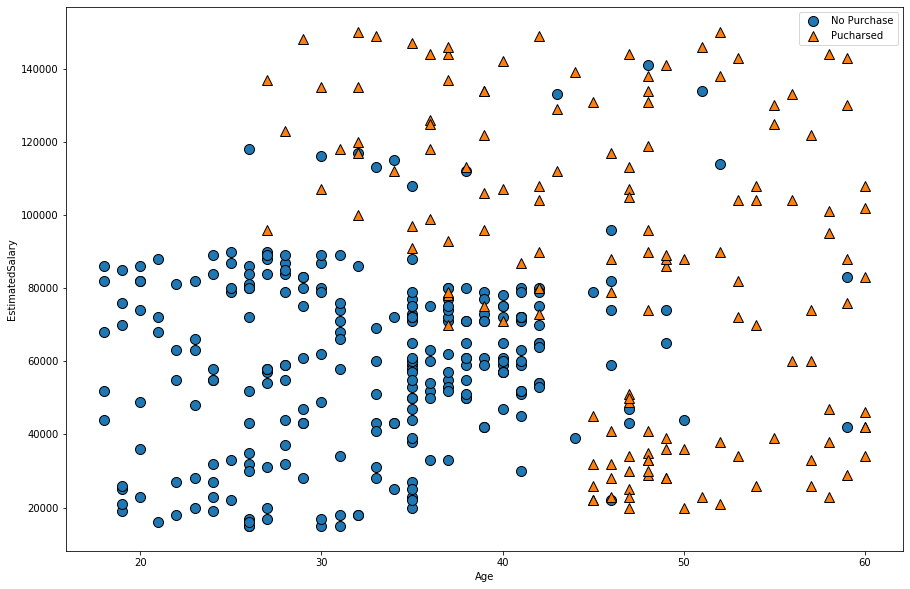

In [3]:
figure=plt.figure(figsize=(15,10))

mglearn.discrete_scatter(dataset.iloc[:,2], dataset.iloc[:,3],dataset.iloc[:,4])
plt.xlabel(dataset.columns[2])
plt.ylabel(dataset.columns[3])
plt.legend(['No Purchase', 'Pucharsed'])

In [276]:
puch = len(dataset['Purchased'][dataset.Purchased==1])
n_puch = len(dataset['Purchased'][dataset.Purchased==0])
total = len(dataset['Purchased'][dataset.Purchased.isin([0,1])])

P_puch = puch/total
P_n_puch = n_puch/total

In [93]:
ages= np.arange(min(dataset.Age),max(dataset.Age)+1)
sum_ag=[]
p_ag=[]
p_pu_ag=[]

for ag_ in ages:
    sum_ag.append(len(dataset[dataset.Age==ag_]))
    p_ag.append(len(dataset[dataset.Age==ag_])/total)
    p_pu_ag.append(sum(dataset[dataset.Age==ag_]['Purchased']))
    
age_d = pd.DataFrame({'Ages': ages, 'Sum': sum_ag, 'Freq': p_ag, 'Purchased': p_pu_ag })
age_d['Prob_Purchased']= age_d['Purchased']/puch

age_d.head()

,Ages,Sum,Freq,Purchased,Prob_Purchased
0,18,5,0.0125,0,0.0
1,19,7,0.0175,0,0.0
2,20,7,0.0175,0,0.0
3,21,4,0.0100,0,0.0
4,22,5,0.0125,0,0.0


Text(0.5, 1.0, 'Age Distribution')

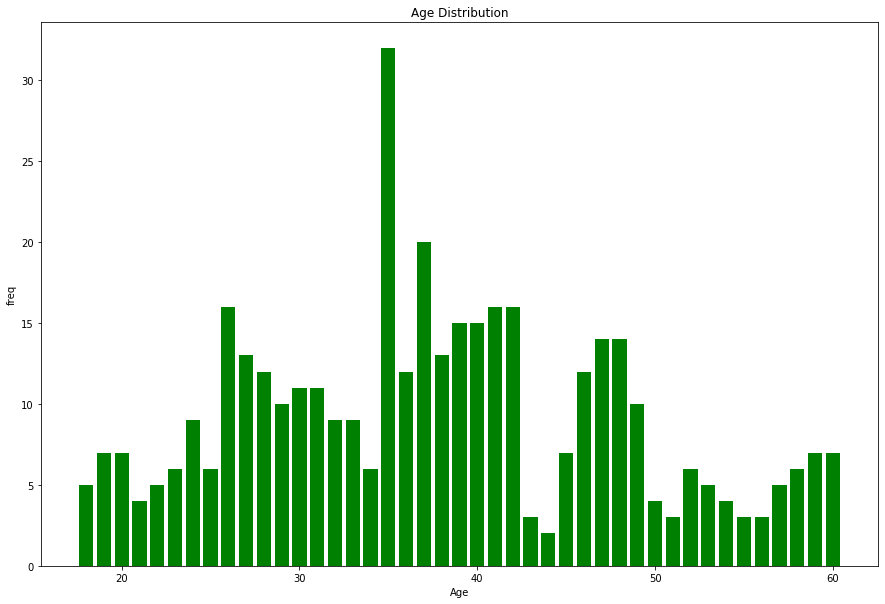

In [151]:
figure=plt.figure(figsize=(15,10))

plt.bar(ages, sum_ag, color='green')
plt.xlabel(dataset.columns[2])
plt.ylabel('freq')
plt.title('Age Distribution')

In [95]:
salaries= np.arange(min(dataset.EstimatedSalary),max(dataset.EstimatedSalary)+1,1000)
sum_sal=[]
p_sal=[]
p_pu_sal=[]

for sal_ in salaries:
    sum_sal.append(len(dataset[dataset.EstimatedSalary==sal_]))
    p_sal.append(len(dataset[dataset.EstimatedSalary==sal_])/total)
    p_pu_sal.append(sum(dataset[dataset.EstimatedSalary==sal_]['Purchased']))
    
sal_d = pd.DataFrame({'Salary': salaries, 'Sum': sum_sal, 'Freq': p_sal, 'Purchased': p_pu_sal  })
sal_d['Prob_Purchased']= sal_d['Purchased']/puch
sal_d.head()

,Salary,Sum,Freq,Purchased,Prob_Purchased
0,15000,4,0.0100,0,0.0
1,16000,2,0.0050,0,0.0
2,17000,3,0.0075,0,0.0
3,18000,4,0.0100,0,0.0
4,19000,2,0.0050,0,0.0


Text(0.5, 1.0, 'Salaries Distribution')

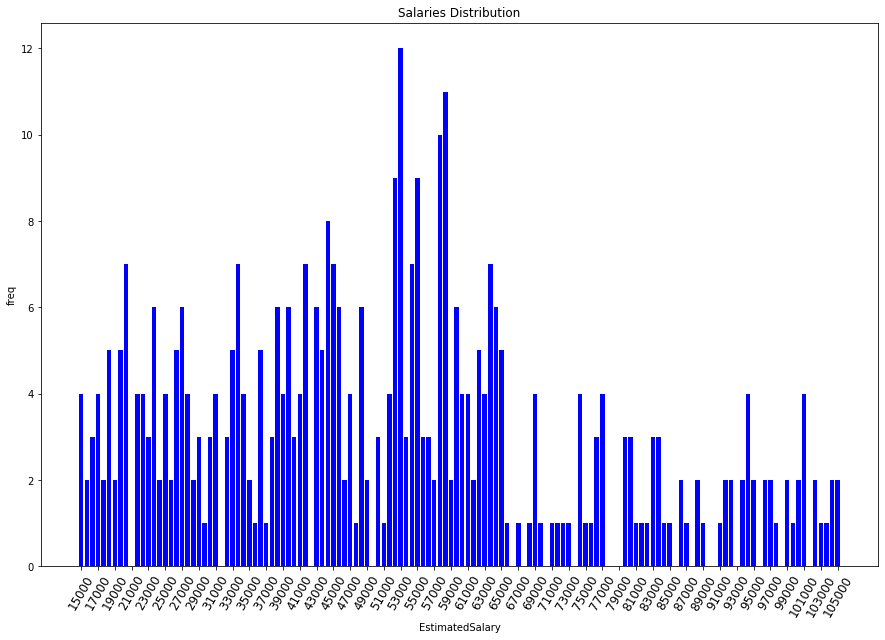

In [150]:
fig=plt.figure(figsize=(15,10))

index = np.arange(len(salaries))

plt.bar(index,sum_sal,color='blue')
plt.xticks(index[::3], salaries[::2],rotation=60,fontsize=12)
plt.xlabel(dataset.columns[3])
plt.ylabel('freq')
plt.title('Salaries Distribution')

In [91]:
# final_ag=[]
# final_sal=[]

# for ag_ in ages:
#     final_ag.append((age_d[age_d.Ages==ag_]['Prob_Purchased'])*(age_d[age_d.Ages==ag_]['Freq'])/P_puch)
    
# for sal_ in salaries:
#     final_sal.append((age_d[age_d.Ages==sal_]['Prob_Purchased'])*(age_d[age_d.Ages==sal_]['Freq'])/P_puch)
    
# age_d['Prob_purchased']= final_ag

In [261]:
def create_buckets(df, feat):
    min_v= np.min(dataset[feat])
    max_v = np.max(dataset[feat])
    n_buck = 10
    inter= (max_v-min_v)/n_buck
    bins = np.arange(min_v, max_v, inter)
    print(bins)
    df["bucket_"+feat] = pd.cut(df[feat], bins,include_lowest=True)

In [263]:
create_buckets(dataset,'Age')
create_buckets(dataset,'EstimatedSalary')

[18.  22.2 26.4 30.6 34.8 39.  43.2 47.4 51.6 55.8]
[ 15000.  28500.  42000.  55500.  69000.  82500.  96000. 109500. 123000.
 136500.]


In [267]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'bucket_Age', 'bucket_EstimatedSalary'],
      dtype='object')

In [272]:
df_cons=dataset.groupby(['bucket_Age','bucket_EstimatedSalary']).sum().reset_index()[['bucket_Age', 
                                                                             'bucket_EstimatedSalary','Purchased']]
df_cons=df_cons[df_cons['Purchased']>0]

In [275]:
df_cons.Purchased.sum()

98.0

In [292]:
dataset=pd.read_csv(r"../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New" \
                    "/Part 3 - Classification\Section 14 - Logistic Regression/Social_Network_Ads.csv")

In [293]:
X=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values

X_col = dataset.columns[2:4]

# # Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0)

# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X=sc_X.transform(X)

In [294]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [295]:
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))

Training set score:0.883
Test set score:0.900


In [296]:
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['MODEL_F','MODEL_P'], index = ['DATA_F','DATA_P'])
df_confusion

,MODEL_F,MODEL_P
DATA_F,65,3
DATA_P,7,25


In [297]:
# sns.set
# fig, ax = plt.subplots(figsize=(15,6))
# ax=sns.heatmap(df_confusion, vmin=0, vmax=70, cmap="YlGnBu", annot=True)
# plt.yticks(rotation=0, fontsize="10", va="top")
# # plt.yticks(np.arange(2)+0.5,('DATA_P','DATA_F'), rotation=0, fontsize="10", va="left")

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


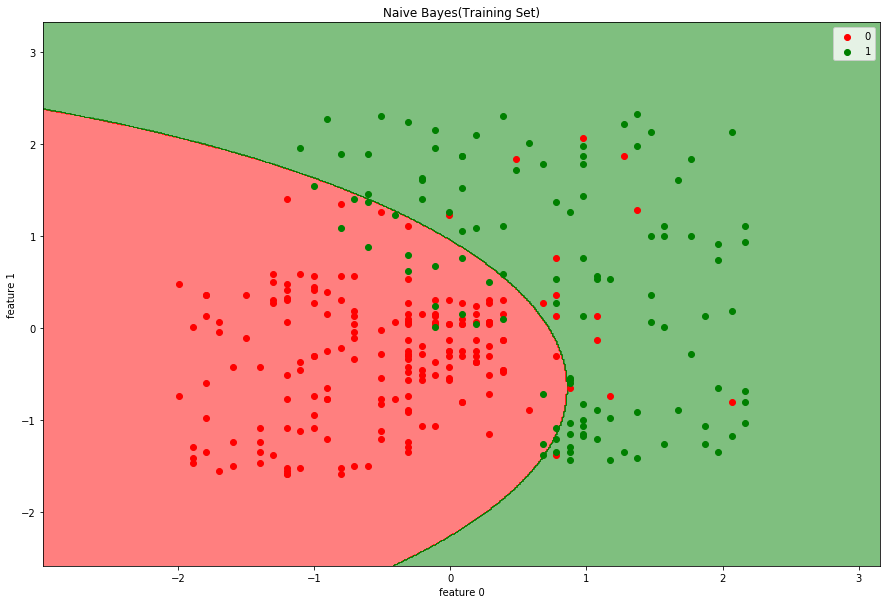

In [300]:
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_train[:,0].min() -1, stop= X_train[:,0].max() +1, step = 0.01),
                     np.arange(start= X_train[:,1].min() -1, stop= X_train[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train== j,0], X_train[y_train==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Naive Bayes(Training Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


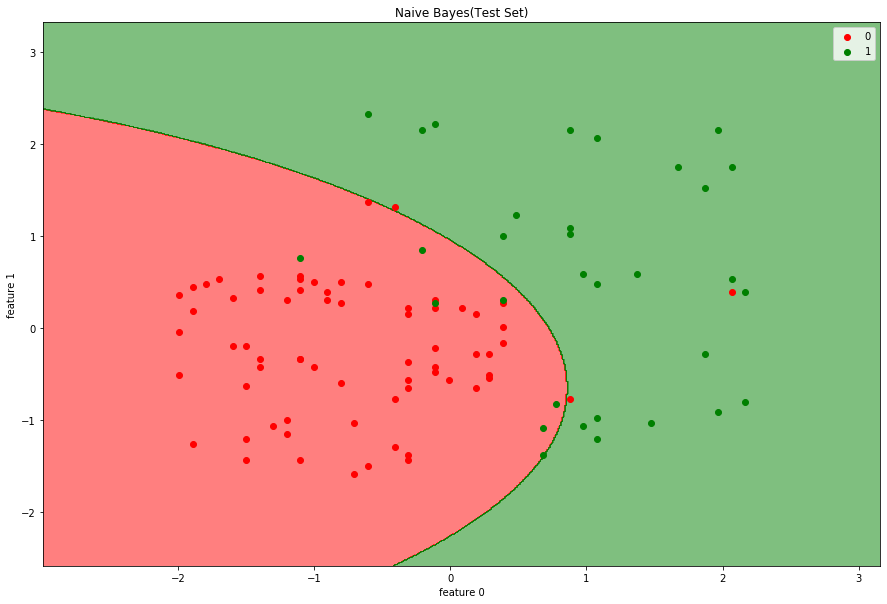

In [301]:
figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test== j,0], X_test[y_test==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Naive Bayes(Test Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')